In [9]:
from textblob import TextBlob
import sys
import numpy as np
import snscrape.modules.twitter as sntwitter
from matplotlib import pyplot as plt

In [3]:

#Ham[0] 2007-09, 2010-2013, 2014-2016,2017-2020, 2021
#Seb[1] 2008-09, 2010-2013,2014-2018,2019-2020,2021
#Verstappen[2] 2015-2016,2016-2018,2019-2020, 2021 #10000 tweets per year


In [44]:
#version 2 with snscrape to scrape old tweets cause twitter api doesnt help
tweets = []
drivers = np.array(['Lewis Hamilton','Sebastian Vettel','Max Verstappen'])
years = 15 #zero indexed
for y in range(years):
    temptweetsfortheyear = []
    for d in drivers:
        temptweetsforcurrdriver = []
        curryear = 2007+y
        search_str = "%s since:%d-01-01 until:%d-12-31 lang:en" % (d,curryear,curryear)
        for i, tweet in enumerate(sntwitter.TwitterSearchScraper(search_str).get_items()):
            if i > 10000:
                break
            temptweetsforcurrdriver.append([d,tweet.date,tweet.id,tweet.content])
        temptweetsfortheyear.append(temptweetsforcurrdriver)
        print(search_str + "number of tweets" + str(len(temptweetsforcurrdriver)))
    tweets.append(temptweetsfortheyear)
tweets = np.array(tweets, dtype =object)

Lewis Hamilton since:2007-01-01 until:2007-12-31 lang:ennumber of tweets526
Sebastian Vettel since:2007-01-01 until:2007-12-31 lang:ennumber of tweets7
Max Verstappen since:2007-01-01 until:2007-12-31 lang:ennumber of tweets0
Lewis Hamilton since:2008-01-01 until:2008-12-31 lang:ennumber of tweets3992
Sebastian Vettel since:2008-01-01 until:2008-12-31 lang:ennumber of tweets260
Max Verstappen since:2008-01-01 until:2008-12-31 lang:ennumber of tweets0
Lewis Hamilton since:2009-01-01 until:2009-12-31 lang:ennumber of tweets10001
Sebastian Vettel since:2009-01-01 until:2009-12-31 lang:ennumber of tweets6244
Max Verstappen since:2009-01-01 until:2009-12-31 lang:ennumber of tweets6
Lewis Hamilton since:2010-01-01 until:2010-12-31 lang:ennumber of tweets10001
Sebastian Vettel since:2010-01-01 until:2010-12-31 lang:ennumber of tweets10001
Max Verstappen since:2010-01-01 until:2010-12-31 lang:ennumber of tweets31
Lewis Hamilton since:2011-01-01 until:2011-12-31 lang:ennumber of tweets10001
Seb

In [ ]:
#tweets[year][driver][tweetno][attribute]
#attributes 0 = driver, 1= tweet date,2 = tweet id, 3 = tweet text
print(tweets[2][1][200][3])

In [45]:
#Lewis is index 0, Seb is index 1, Max is index 2
positives = [] 
negatives = []
neutral = []
polarities = []

#polarities[year][driver]
#neutrals[year][driver]
#positives[year][driver]
#negatives[year][driver]

for y in range(years):
    temppositiveyear = []
    tempnegativeyear = []
    tempneutralyear = []
    temppolarityyear = []
    for d in range(len(drivers)):
        temppositive = 0
        tempnegative = 0
        tempneutral = 0
        temppolarity = 0        
        for i in tweets[y][d]:
            cleaned  =  i[3].replace('RT','')
            if (cleaned.startswith(' @')):
                pos = cleaned.index('')
                cleaned = cleaned[pos+2:]
            if (cleaned.startswith('@')):
                pos = cleaned.index('')
                cleaned = cleaned[pos+2:]        
            currBlobToAnalyse = TextBlob(cleaned)
            currpolarity = currBlobToAnalyse.polarity
            if (currpolarity > 0.00):
                temppositive += 1
            elif (currpolarity < 0.00):
                tempnegative += 1
            elif (currpolarity == 0.00):
                tempneutral += 1
            temppolarity += currpolarity
        temppositiveyear.append(temppositive)
        tempnegativeyear.append(tempnegative)
        tempneutralyear.append(tempneutral)
        temppolarityyear.append(temppolarity)
    positives.append(temppositiveyear)
    negatives.append(tempnegativeyear)
    neutral.append(tempneutralyear)
    polarities.append(temppolarityyear)
print(polarities)
positives = np.array(positives)
negatives = np.array(negatives)
neutral = np.array(neutral)
polarities = np.array(polarities)

[[88.78307697510824, 0.16136363636363635, 0], [645.3441838222637, 49.364951467803, 0], [1745.6830691034272, 999.6010493740574, 0.12878787878787873], [1599.204183924405, 1913.3690427139998, 2.9738636363636366], [2006.8188222761187, 1537.1479487538638, 1.7638762626262627], [1777.3139473548883, 1360.600380979422, 32.532170780608276], [2242.3917849363984, 1554.462833994811, 69.77433249909811], [1854.789196603291, 1176.709221891536, 831.7955368682311], [1924.074365913125, 1397.4588821259092, 1931.190474899356], [1827.9719204066803, 556.3608429647269, 1749.9065257465138], [543.2701159957637, 1483.7229298808068, 1720.3327263417148], [1416.8051184901622, 1337.6723073279036, 1354.7458928586052], [1528.933220018542, 1355.4442572142905, 2028.9583295171706], [1447.6921393005143, 1459.159494448685, 1728.4440692146854], [1358.2440840124355, 1543.1814598248438, 1165.8782911750998]]


In [55]:
yearlabels = np.array(['07','08','09','10','11','12','13','14','15','16','17','18','19','20','21'])
polarities.T[0]


array([  88.78307698,  645.34418382, 1745.6830691 , 1599.20418392,
       2006.81882228, 1777.31394735, 2242.39178494, 1854.7891966 ,
       1924.07436591, 1827.97192041,  543.270116  , 1416.80511849,
       1528.93322002, 1447.6921393 , 1358.24408401])

In [48]:
def plotlinegraph(x,y,title,xlabel,ylabel,savefilenamewithextension):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x,y)
    plt.savefig(savefilenamewithextension)

def plotbargraph(x,y,title,xlabel,ylabel,savefilenamewithextension):
    plt.bar(x,y,align = 'center')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(savefilenamewithextension)
    
def plotmanybargraph(x,y,y2,y3,title,xlabel,ylabel,savefilenamewithextension):
    plt.bar(x,y,color = 'c')
    plt.bar(x,y2,color = 'r')
    plt.bar(x,y3, color = 'b')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(labels=['Lewis Hamilton', 'Sebastian Vettel','Max Verstappen'])
    plt.savefig(savefilenamewithextension)

def plotmanylinegraph(x,y,y2,y3,title,xlabel,ylabel,savefilenamewithextension):
    plt.plot(x,y,color = 'c')
    plt.plot(x,y2,color = 'r')
    plt.plot(x,y3, color = 'b')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(labels=['Lewis Hamilton', 'Sebastian Vettel','Max Verstappen'])
    plt.savefig(savefilenamewithextension)

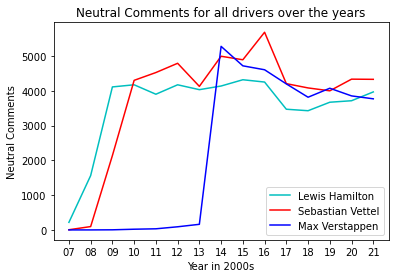

In [67]:
plotmanylinegraph(yearlabels,neutral.T[0],neutral.T[1],neutral.T[2],'Neutral Comments for all drivers over the years','Year in 2000s','Neutral Comments','Neutral Comments over the years with all 3 drivers.png')

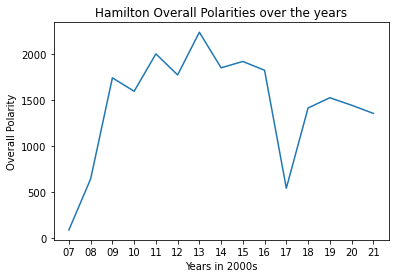

In [68]:
plotlinegraph(yearlabels,polarities.T[0],'Hamilton Overall Polarities over the years',"Years in 2000s","Overall Polarity",'Hamilton Overall Polarities over the years.png')

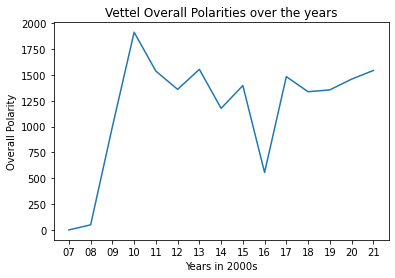

In [69]:
plotlinegraph(yearlabels,polarities.T[1],'Vettel Overall Polarities over the years',"Years in 2000s","Overall Polarity",'Vettel Overall Polarities over the years.png')

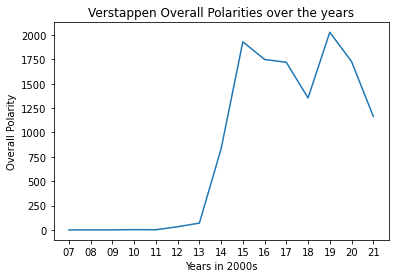

In [70]:
plotlinegraph(yearlabels,polarities.T[2],'Verstappen Overall Polarities over the years',"Years in 2000s","Overall Polarity",'Verstappen Overall Polarities over the years.png')

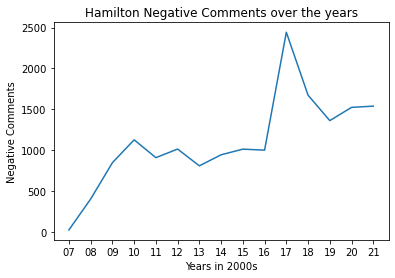

In [71]:
plotlinegraph(yearlabels,negatives.T[0],'Hamilton Negative Comments over the years',"Years in 2000s","Negative Comments",'Hamilton Negative Comments over the years.png')

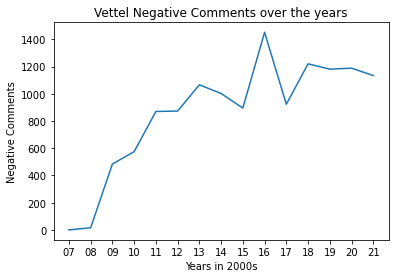

In [56]:
plotlinegraph(yearlabels,negatives.T[1],'Vettel Negative Comments over the years',"Years in 2000s","Negative Comments",'Vettel Negative Comments over the years.png')

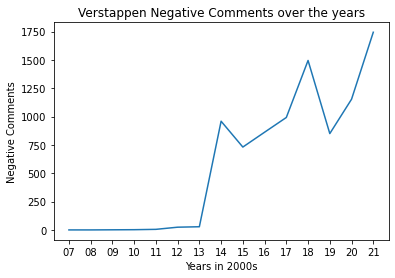

In [57]:
plotlinegraph(yearlabels,negatives.T[2],'Verstappen Negative Comments over the years',"Years in 2000s","Negative Comments",'Verstappen Negative Comments over the years.png')

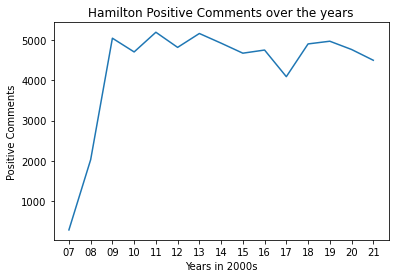

In [58]:
plotlinegraph(yearlabels,positives.T[0],'Hamilton Positive Comments over the years',"Years in 2000s","Positive Comments",'Hamilton Positive Comments over the years.png')

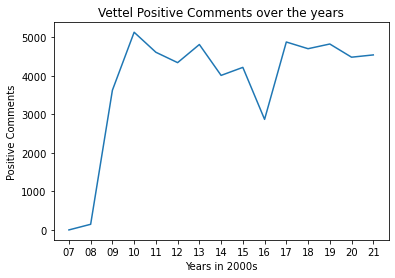

In [59]:
plotlinegraph(yearlabels,positives.T[1],'Vettel Positive Comments over the years',"Years in 2000s","Positive Comments",'Vettel Positive Comments over the years.png')

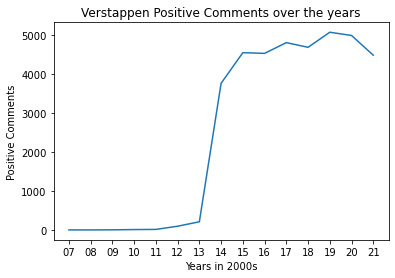

In [60]:
plotlinegraph(yearlabels,positives.T[2],'Verstappen Positive Comments over the years',"Years in 2000s","Positive Comments",'Verstappen Positive Comments over the years.png')

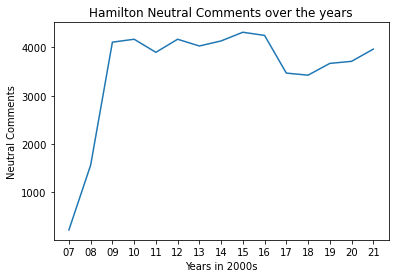

In [61]:
plotlinegraph(yearlabels,neutral.T[0],'Hamilton Neutral Comments over the years',"Years in 2000s","Neutral Comments",'Hamilton Neutral Comments over the years.png')

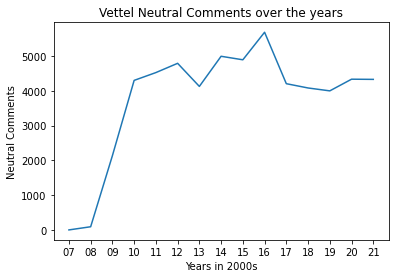

In [62]:
plotlinegraph(yearlabels,neutral.T[1],'Vettel Neutral Comments over the years',"Years in 2000s","Neutral Comments",'Vettel Neutral Comments over the years.png')

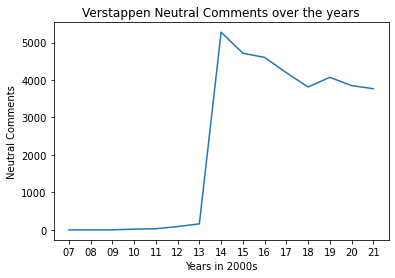

In [63]:
plotlinegraph(yearlabels,neutral.T[2],'Verstappen Neutral Comments over the years',"Years in 2000s","Neutral Comments",'Verstappen Neutral Comments over the years.png')


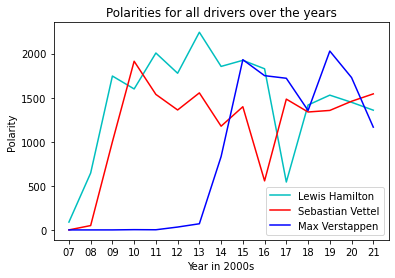

In [64]:
plotmanylinegraph(yearlabels,polarities.T[0],polarities.T[1],polarities.T[2],'Polarities for all drivers over the years','Year in 2000s','Polarity','Polarities over the years with all 3 drivers.png')

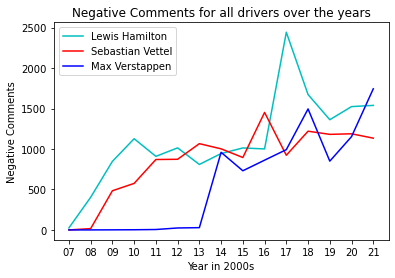

In [65]:
plotmanylinegraph(yearlabels,negatives.T[0],negatives.T[1],negatives.T[2],'Negative Comments for all drivers over the years','Year in 2000s','Negative Comments','Negative Comments over the years with all 3 drivers.png')


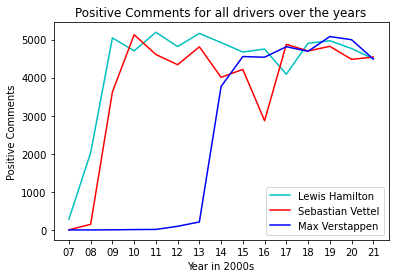

In [66]:
plotmanylinegraph(yearlabels,positives.T[0],positives.T[1],positives.T[2],'Positive Comments for all drivers over the years','Year in 2000s','Positive Comments','Positive Comments over the years with all 3 drivers.png')